In [ ]:
# Create folders
!mkdir -p zero_hunger_mas/agents



In [ ]:
!pip install huggingface_hub


In [ ]:
from huggingface_hub import InferenceClient
from google.colab import userdata
import os

os.environ["HUGGINGFACEHUB_API_TOKEN"] = userdata.get('HF_TOKEN')

# Initialize client
client = InferenceClient("mistralai/Mixtral-8x7B-Instruct-v0.1", token=os.environ["HUGGINGFACEHUB_API_TOKEN"])

def query_huggingface(prompt):
    print("🔍 Prompt:", prompt)
    messages = [{"role": "user", "content": prompt}]
    return client.chat_completion(messages, max_tokens=500).choices[0].message.content.strip()

In [ ]:
%%writefile zero_hunger_mas/agents/environment.py
import random

class EnvironmentAgent:
    def __init__(self):
        self.soil_quality = random.choice(["poor", "moderate", "rich"])
        self.water_level = random.choice(["scarce", "adequate", "abundant"])
        self.weather_event = random.choice(["drought", "flood", "normal"])

    def simulate_conditions(self):
        self.soil_quality = random.choice(["poor", "moderate", "rich"])
        self.water_level = random.choice(["scarce", "adequate", "abundant"])
        self.weather_event = random.choice(["drought", "flood", "normal"])


Overwriting zero_hunger_mas/agents/environment.py


In [ ]:
%%writefile zero_hunger_mas/agents/farmer.py
class FarmerAgent:
    def __init__(self, environment, policy_engine):
        self.environment = environment
        self.policy_engine = policy_engine

    def decide_crop(self):
        prompt = f"The soil is {self.environment.soil_quality}, water is {self.environment.water_level}. Recommend a crop."
        return self.policy_engine(prompt)


Overwriting zero_hunger_mas/agents/farmer.py


In [ ]:
%%writefile zero_hunger_mas/agents/consumer.py
class ConsumerAgent:
    def __init__(self, policy_engine):
        self.policy_engine = policy_engine

    def request_nutrition_advice(self, available_items):
        prompt = f"A consumer has access only to {', '.join(available_items)}. Suggest a balanced diet using these items."
        return self.policy_engine(prompt)


Overwriting zero_hunger_mas/agents/consumer.py


In [ ]:
%%writefile zero_hunger_mas/agents/distributor.py
class DistributorAgent:
    def __init__(self, policy_engine):
        self.policy_engine = policy_engine

    def adjust_distribution(self, region_data):
        prompt = f"Region data shows supply-demand imbalance: {region_data}. How should distribution be adjusted?"
        return self.policy_engine(prompt)


Overwriting zero_hunger_mas/agents/distributor.py


In [ ]:
%%writefile zero_hunger_mas/agents/nutrition_expert.py
class NutritionExpertAgent:
    def __init__(self, policy_engine):
        self.policy_engine = policy_engine

    def provide_diet_plan(self, health_conditions, foods_available):
        prompt = f"A person with {health_conditions} has access to {', '.join(foods_available)}. Recommend a diet plan."
        return self.policy_engine(prompt)


Overwriting zero_hunger_mas/agents/nutrition_expert.py


In [ ]:
%%writefile zero_hunger_mas/run_simulation.py
from agents.environment import EnvironmentAgent
from agents.farmer import FarmerAgent
from agents.consumer import ConsumerAgent
from agents.distributor import DistributorAgent
from agents.nutrition_expert import NutritionExpertAgent

def run_simulation(policy_engine):
    # Create environment
    env = EnvironmentAgent()
    env.simulate_conditions()

    # Instantiate agents
    farmer = FarmerAgent(env, policy_engine)
    consumer = ConsumerAgent(policy_engine)
    distributor = DistributorAgent(policy_engine)
    nutritionist = NutritionExpertAgent(policy_engine)

    # Simulate interactions
    print("🌾 Farmer decision:", farmer.decide_crop())
    print("🛒 Consumer diet:", consumer.request_nutrition_advice(["rice", "lentils", "bananas"]))
    print("🚛 Distribution advice:", distributor.adjust_distribution("High demand, low supply in Region A"))
    print("🥗 Nutrition plan:", nutritionist.provide_diet_plan("diabetes", ["oats", "greens", "chicken"]))

Overwriting zero_hunger_mas/run_simulation.py


#How to Test Prompts Manually

In [ ]:
from zero_hunger_mas.agents.environment import EnvironmentAgent
from zero_hunger_mas.agents.farmer import FarmerAgent
from zero_hunger_mas.agents.consumer import ConsumerAgent
from zero_hunger_mas.agents.distributor import DistributorAgent
from zero_hunger_mas.agents.nutrition_expert import NutritionExpertAgent


In [ ]:
def query_huggingface(prompt):
    messages = [{"role": "user", "content": prompt}]
    return client.chat_completion(messages, max_tokens=500).choices[0].message.content.strip()

##Testing diff agents whether existing or not

In [ ]:
env = EnvironmentAgent()
env.soil_quality = "poor"
env.water_level = "scarce"

farmer = FarmerAgent(env, query_huggingface)
print("Farmer Decision:", farmer.decide_crop())

Farmer Decision: In a situation where the soil is poor and water is scarce, a crop that I would recommend is quinoa (Chenopodium quinoa). Quinoa is a hardy crop that is well-adapted to dry, nutrient-poor soils and can survive in harsh conditions where many other crops would fail.

Quinoa is a highly nutritious grain that is rich in protein, fiber, and essential minerals, making it an excellent choice for food security in challenging environments. It is also relatively drought-tolerant and can be grown with minimal irrigation, which makes it a suitable crop for areas with limited water resources.

Quinoa is a versatile crop that can be grown in a wide range of climates and altitudes, from sea level to 4,000 meters above sea level. It is also a short-season crop, typically taking between 90 to 120 days from planting to harvest, which can help reduce the risk of crop failure due to unpredictable weather patterns.

Overall, quinoa is an excellent crop choice for areas with poor soil and li

In [ ]:
consumer = ConsumerAgent(query_huggingface)
print("Consumer Diet:", consumer.request_nutrition_advice(["rice", "lentils", "bananas"]))

Consumer Diet: Sure, I'd be happy to help! Here's an example of a balanced diet using only rice, lentils, and bananas:

* Breakfast: Banana porridge
	+ Cook 1/2 cup of rice in 1 cup of water until soft and creamy.
	+ Mash 1 ripe banana and mix it into the cooked rice.
	+ Sprinkle with cinnamon or nutmeg, if desired.
* Lunch: Lentil and rice salad
	+ Cook 1 cup of lentils according to package directions.
	+ Cook 1 cup of rice according to package directions.
	+ Mix the cooked lentils and rice together in a large bowl.
	+ Add diced vegetables such as bell peppers, tomatoes, and cucumbers.
	+ Dress with a simple vinaigrette made from olive oil, vinegar, and mustard.
* Dinner: Rice and banana stew
	+ In a large pot, sauté diced onions, garlic, and ginger in a little oil until soft.
	+ Add 1 cup of rice and stir to coat with the oil and onion mixture.
	+ Add 2 cups of water and bring to a boil.
	+ Once boiling, add 2 chopped bananas and 1 cup of cooked lentils.
	+ Reduce heat to low, cover,

In [ ]:
distributor = DistributorAgent(query_huggingface)
print("Distribution Advice:", distributor.adjust_distribution("High demand, low supply in Region A"))

Distribution Advice: If the data shows a supply-demand imbalance in Region A with high demand and low supply, there are several ways to adjust the distribution to better match the market conditions:

1. Increase supply: Encourage more producers to enter the market in Region A by offering incentives, reducing barriers to entry, or providing assistance to existing producers to expand their operations. This can help increase the supply of goods or services in the region and alleviate the imbalance.
2. Decrease demand: Implement demand management strategies to reduce the demand for goods or services in Region A. This could include promoting alternative options, implementing pricing strategies, or encouraging consumers to shift their consumption to other regions or times.
3. Redirect supply: Consider redirecting supply from other regions to Region A to address the imbalance. This may involve adjusting transportation or logistics systems to make it easier to move goods or services between re

In [ ]:
nutritionist = NutritionExpertAgent(query_huggingface)
print("Nutrition Plan:", nutritionist.provide_diet_plan("diabetes", ["oats", "greens", "chicken"]))

Nutrition Plan: Sure, I'd be happy to help you create a healthy meal plan for someone with diabetes using those foods. Here's a sample diet plan:

**Breakfast:**

* Steel-cut oats with almond milk, topped with a handful of berries and a sprinkle of cinnamon
* A glass of water with a slice of lemon

**Mid-Morning Snack:**

* A cup of raw veggies (like carrots, cucumber, and cherry tomatoes) with hummus
* A cup of unsweetened tea or coffee

**Lunch:**

* Grilled chicken breast (3-4 oz) served on a bed of mixed greens with a variety of colorful veggies (like bell peppers, red onion, and shredded carrots)
* A homemade vinaigrette dressing made with olive oil, vinegar, and herbs or spices
* A piece of fruit for dessert (like an apple or a pear)

**Afternoon Snack:**

* A small handful of nuts and seeds (like almonds and sunflower seeds)
* A cup of herbal tea

**Dinner:**

* Grilled chicken thighs (3-4 oz) served with roasted vegetables (like broccoli, cauliflower, and brussels sprouts) seas

##Testing by giving changing the prompt each time...





In [ ]:
custom_prompt = "A country is experiencing rapid urbanization and rural food supply chains are broken. Suggest sustainable policies to fix it."
print("Custom Response:", query_huggingface(custom_prompt))


Custom Response: Rapid urbanization can put significant pressure on food supply chains, particularly when it comes to ensuring food security in rural areas. Here are some sustainable policies that could help fix broken rural food supply chains:

1. Support local food systems: Policies that promote local food systems can help to reduce the distance that food needs to travel, supports local farmers and producers, and can help to ensure that rural communities have access to fresh, nutritious food. This could include things like farmers' markets, community-supported agriculture programs, and local food hubs.
2. Improve transportation and infrastructure: In many cases, rural food supply chains are broken because of inadequate transportation and infrastructure. Policies that invest in roads, railways, and other forms of transportation can help to connect rural producers with urban markets, making it easier for them to sell their products. Similarly, policies that improve rural infrastructure

In [ ]:
custom_prompt = "Due to unexpected floods, large quantities of harvested crops are rotting in storage. Suggest immediate and long-term actions to reduce food loss and improve resilience."
print("Custom Response:", query_huggingface(custom_prompt))


Custom Response: Immediate actions to reduce food loss:

1. Relocate: If possible, transfer the rotting crops to higher ground or dryer storage facilities to prevent further damage.

2. Sort and distribute: Sort through the damaged crops and distribute undamaged ones to local food banks, shelters, and communities in need.

3. Clean and dry: Clean and dry the storage facilities thoroughly to prevent mold growth and further contamination.

4. Consult experts: Seek advice from agricultural extension services, crop specialists, and engineers on how to salvage damaged crops and improve storage conditions.

5. Document losses: Document the extent of the damage for insurance purposes and potential government aid.

Long-term actions to improve resilience:

1. Invest in infrastructure: Upgrade storage facilities with climate-control systems, waterproofing, and proper ventilation to minimize the risk of damage from floods and other natural disasters.

2. Diversify crops: Promote crop diversity t

##Testing by giving the prompts using UI

---



In [ ]:
import ipywidgets as widgets
from IPython.display import display, Markdown

# Create input box
prompt_box = widgets.Textarea(
    value='',
    placeholder='Type your policy question or food issue here...',
    description='Prompt:',
    layout=widgets.Layout(width='90%', height='100px'),
    style={'description_width': 'initial'}
)

# Create button
run_button = widgets.Button(
    description='Ask',
    button_style='success',
    tooltip='Click to get AI response'
)

# Create output area
output = widgets.Output()

# Define the callback
def on_button_click(b):
    output.clear_output()
    with output:
        prompt = prompt_box.value
        if not prompt.strip():
            print("⚠️ Please enter a prompt.")
        else:
            print("🔍 Prompt:", prompt)
            response = query_huggingface(prompt)
            display(Markdown(f"### 🤖 Response:\n{response}"))

# Link the button
run_button.on_click(on_button_click)


prompt_type = widgets.Dropdown(
    options=[
        'Policy Recommendation',
        'Nutrition Advice',
        'Farmer Guidance',
        'Disaster Response',
        'Supply Chain Fix'
    ],
    description='Prompt Type:'
)

def fill_example_prompt(change):
    example_prompts = {
        'Policy Recommendation': "Suggest a national food redistribution policy to reduce hunger in urban slums.",
        'Nutrition Advice': "A consumer has access only to potatoes, spinach, and milk. Suggest a balanced meal plan.",
        'Farmer Guidance': "The soil is acidic and water is limited. What crops should a farmer plant?",
        'Disaster Response': "Floods destroyed rural storage. What emergency food strategies can help?",
        'Supply Chain Fix': "There is overproduction in Region A and shortage in Region B. Suggest logistics solutions."
    }
    prompt_box.value = example_prompts[change['new']]

prompt_type.observe(fill_example_prompt, names='value')
display(prompt_type)


# Display all
display(prompt_box, run_button, output)




Dropdown(description='Prompt Type:', options=('Policy Recommendation', 'Nutrition Advice', 'Farmer Guidance', …

Textarea(value='', description='Prompt:', layout=Layout(height='100px', width='90%'), placeholder='Type your p…

Button(button_style='success', description='Ask', style=ButtonStyle(), tooltip='Click to get AI response')

Output()

###Visualisation

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


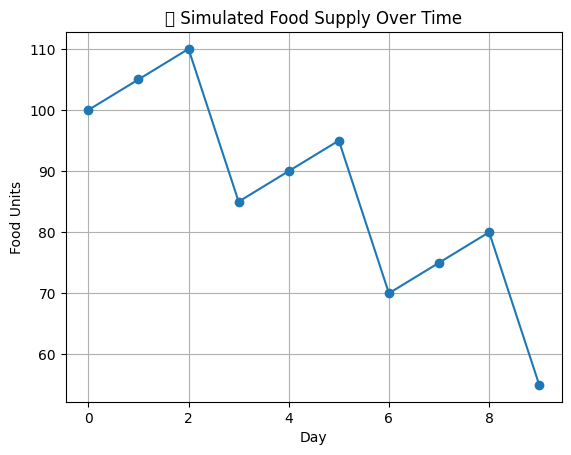

In [ ]:
import matplotlib.pyplot as plt

def plot_food_supply():
    days = list(range(10))
    supply = [100 - day * 5 + (day % 3) * 10 for day in days]
    plt.plot(days, supply, marker='o')
    plt.title("📈 Simulated Food Supply Over Time")
    plt.xlabel("Day")
    plt.ylabel("Food Units")
    plt.grid(True)
    plt.show()

plot_food_supply()